In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer=pd.read_csv('bigmart_data.csv')
customer.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
mean=customer['Item_Weight'].mean()
customer['Item_Weight']=customer['Item_Weight'].fillna(mean)
X=customer[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_MRP','Item_Type','Outlet_Identifier',
            'Outlet_Size','Item_Identifier','Item_Fat_Content','Outlet_Type','Outlet_Location_Type']]
y=customer['Item_Outlet_Sales']

In [158]:
#X=customer.iloc[:,1:4].values
#y=customer.iloc[:,5].values

<AxesSubplot:>

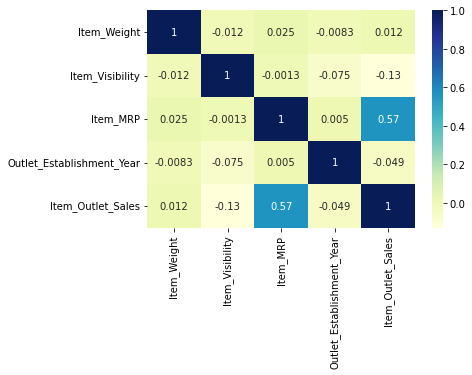

In [6]:
sns.heatmap(customer.corr(),annot=True,cmap="YlGnBu")

In [251]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder=LabelEncoder()
X['Item_Type']=labelencoder.fit_transform(X['Item_Type'])
X['Outlet_Identifier']=labelencoder.fit_transform(X['Outlet_Identifier'])
X['Outlet_Size']=labelencoder.fit_transform(X['Outlet_Size'])
X['Item_Identifier']=labelencoder.fit_transform(X['Item_Identifier'])
X['Item_Fat_Content']=labelencoder.fit_transform(X['Item_Fat_Content'])
X['Outlet_Type']=labelencoder.fit_transform(X['Outlet_Type'])
X['Outlet_Location_Type']=labelencoder.fit_transform(X['Outlet_Location_Type'])



In [252]:
display(X)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_MRP,Item_Type,Outlet_Identifier,Outlet_Size,Item_Identifier,Item_Fat_Content,...,1598,1599,1600,Item_Type_N,Outlet_Identifier_N,Outlet_Size_N,Item_Identifier_N,Item_Fat_Content_N,Outlet_Type_N,Outlet_Location_Type_N
0,9.300,0.016047,249.8092,1999,249.8092,4,9,1,156,1,...,1.0,0.0,0.0,4,9,1,156,1,1,0
1,5.920,0.019278,48.2692,2009,48.2692,14,3,1,8,2,...,0.0,0.0,1.0,14,3,1,8,2,2,2
2,17.500,0.016760,141.6180,1999,141.6180,10,9,1,662,1,...,1.0,0.0,0.0,10,9,1,662,1,1,0
3,19.200,0.000000,182.0950,1998,182.0950,6,0,3,1121,2,...,0.0,0.0,1.0,6,0,3,1121,2,0,2
4,8.930,0.000000,53.8614,1987,53.8614,9,1,0,1297,1,...,0.0,0.0,1.0,9,1,0,1297,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,214.5218,13,1,0,370,1,...,0.0,0.0,1.0,13,1,0,370,1,1,2
8519,8.380,0.046982,108.1570,2002,108.1570,0,7,3,897,2,...,0.0,1.0,0.0,0,7,3,897,2,1,1
8520,10.600,0.035186,85.1224,2004,85.1224,8,6,2,1357,1,...,0.0,1.0,0.0,8,6,2,1357,1,1,1
8521,7.210,0.145221,103.1332,2009,103.1332,13,3,1,681,2,...,0.0,0.0,1.0,13,3,1,681,2,2,2


In [212]:
X.shape

(8523, 12)

In [163]:
display(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [164]:
y.shape

(8523,)

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
#X_train = X_train.values.reshape(-1,1)

In [74]:
#y_train = y_train.values.reshape(-1,1)

In [75]:
#X_test  = X_test.values.reshape(-1,1)

In [76]:
#y_test = y_test.values.reshape(-1,1)

In [226]:
display(X_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_MRP,Item_Type,Outlet_Identifier,Outlet_Size,Item_Identifier,Item_Fat_Content,Outlet_Type,Outlet_Location_Type
6404,12.857645,0.008722,123.5414,1985,123.5414,6,5,1,188,1,3,2
5820,18.700000,0.014623,52.0324,2002,52.0324,14,7,3,70,1,1,1
48,15.850000,0.121633,60.6220,1997,60.6220,0,8,2,586,2,1,0
4583,12.857645,0.145670,247.2776,1985,247.2776,5,4,2,194,1,0,0
3791,21.000000,0.049296,194.4478,2004,194.4478,13,6,2,436,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4373,15.200000,0.020280,49.1034,1998,49.1034,8,0,3,1413,1,0,2
7891,12.857645,0.025616,188.1872,1985,188.1872,13,5,1,746,2,3,2
4859,13.500000,0.000000,78.3960,2004,78.3960,13,6,2,705,2,1,1
3264,18.700000,0.104890,121.4072,2002,121.4072,5,7,3,501,1,1,1


In [168]:
X_train.shape

(6818, 6)

In [170]:
y_train.shape

(6818,)

In [172]:
X_test.shape

(1705, 6)

In [174]:
y_test.shape

(1705,)

In [227]:
from sklearn.linear_model import LinearRegression
model_fit=LinearRegression()
model_fit.fit(X_train,y_train)

LinearRegression()

In [228]:
y_pred= model_fit.predict(X_test)
y_pred

array([2379.11740384, 2605.7493631 , 1748.10648215, ..., 3639.57489468,
       -298.37352214, 5447.82717607])

In [229]:
print(model_fit.coef_)

[-1.97769813e+00 -1.75418514e+03  7.76955449e+00 -2.71434876e+00
  7.76955449e+00  1.14686775e-01  5.71667845e+01  8.83540701e+00
 -3.98526828e-03  3.21350818e+01  8.51141147e+02 -6.26950648e+01]


In [230]:
print(model_fit.intercept_)

4278.054469119982


In [231]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5045994804329741